<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Color-pitch-associations-in-word-embeddings" data-toc-modified-id="Color-pitch-associations-in-word-embeddings-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Color-pitch associations in word embeddings</a></span></li><li><span><a href="#Convert-notebook-to-html" data-toc-modified-id="Convert-notebook-to-html-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Convert notebook to html</a></span></li></ul></div>

In [1]:
%matplotlib inline
from IPython.display import display, display_markdown

import subprocess as sp
import numpy as np
import pandas as pd
import seaborn as sns
import pymc3 as pm
import arviz as az
import bambi
import copy

import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [10, 8]
plt.rcParams['figure.dpi'] = 300

from subs2vec.utensils import log_timer
from subs2vec.vecs import Vectors
from subs2vec.neighbors import compute_nn

def display_md(md, **kwargs):
    return display_markdown(md, raw=True, **kwargs)

def convert_notebook(title, output='html'):
    convert = sp.run(f'jupyter nbconvert {title}.ipynb --to {output} --output {title}.{output}'.split(' '))
    if convert.returncode == 0:
        display_md(f'Jupyter notebook `{title}` converted successfully.')
    else:
        display_md(f'Error: encountered problem converting Jupyter notebook `{title}`')

def download(fname):
    dl = sp.run(f'wget {fname}'.split(' '))
    if dl.returncode == 0:
        display_md(f'Download of `{fname}` succesful.')
    else:
        display_md(f'Download of `{fname}` failed.')
        
@log_timer
def filter_vecs(vecs, filter_words):
    filtered_vecs = copy.deepcopy(vecs)
    filtered_vecs.vectors = filtered_vecs.vectors[np.isin(filtered_vecs.words, filter_words)]
    filtered_vecs.words = filtered_vecs.words[np.isin(filtered_vecs.words, filter_words)]
    filtered_vecs.n = len(filtered_vecs.words)
    display_md(f'Filtered {vecs.n} vectors, {filtered_vecs.n} remaining.')
    return filtered_vecs

def norm(x):
    return x / np.linalg.norm(x, 2)

sns.set(style='whitegrid')

# Color-pitch associations in word embeddings

In [2]:
# load vectors
linked_vecs = Vectors('../embeddings/linked.mega.en.1e6.vec', n=2e5, d=300, normalize=True)
linked_vecs_dict = linked_vecs.as_dict()

INFO:root:loading vectors ../embeddings/linked.mega.en.1e6.vec
INFO:root:<function Vectors.__init__ at 0x7f8839dc0d08> ran in 16.071 seconds
INFO:root:<function Vectors.as_dict at 0x7f8839dc0f28> ran in 0.146 seconds


In [3]:
colors = ['white', 'red', 'orange', 'yellow', 'green', 'blue', 'purple', 'brown', 'black']
y = [np.dot(norm(linked_vecs_dict['low_pitch'] - linked_vecs_dict['high_pitch']),
            linked_vecs_dict[color]) for color in colors]
df_pitch = pd.DataFrame(zip(colors, y), columns=['color', 'pitch'])
display(df_pitch)

,color,pitch
0,white,-0.012848
1,red,-0.005823
2,orange,-0.054916
3,yellow,-0.008608
4,green,0.012916
5,blue,-0.043087
6,purple,-0.048701
7,brown,0.005345
8,black,0.001583


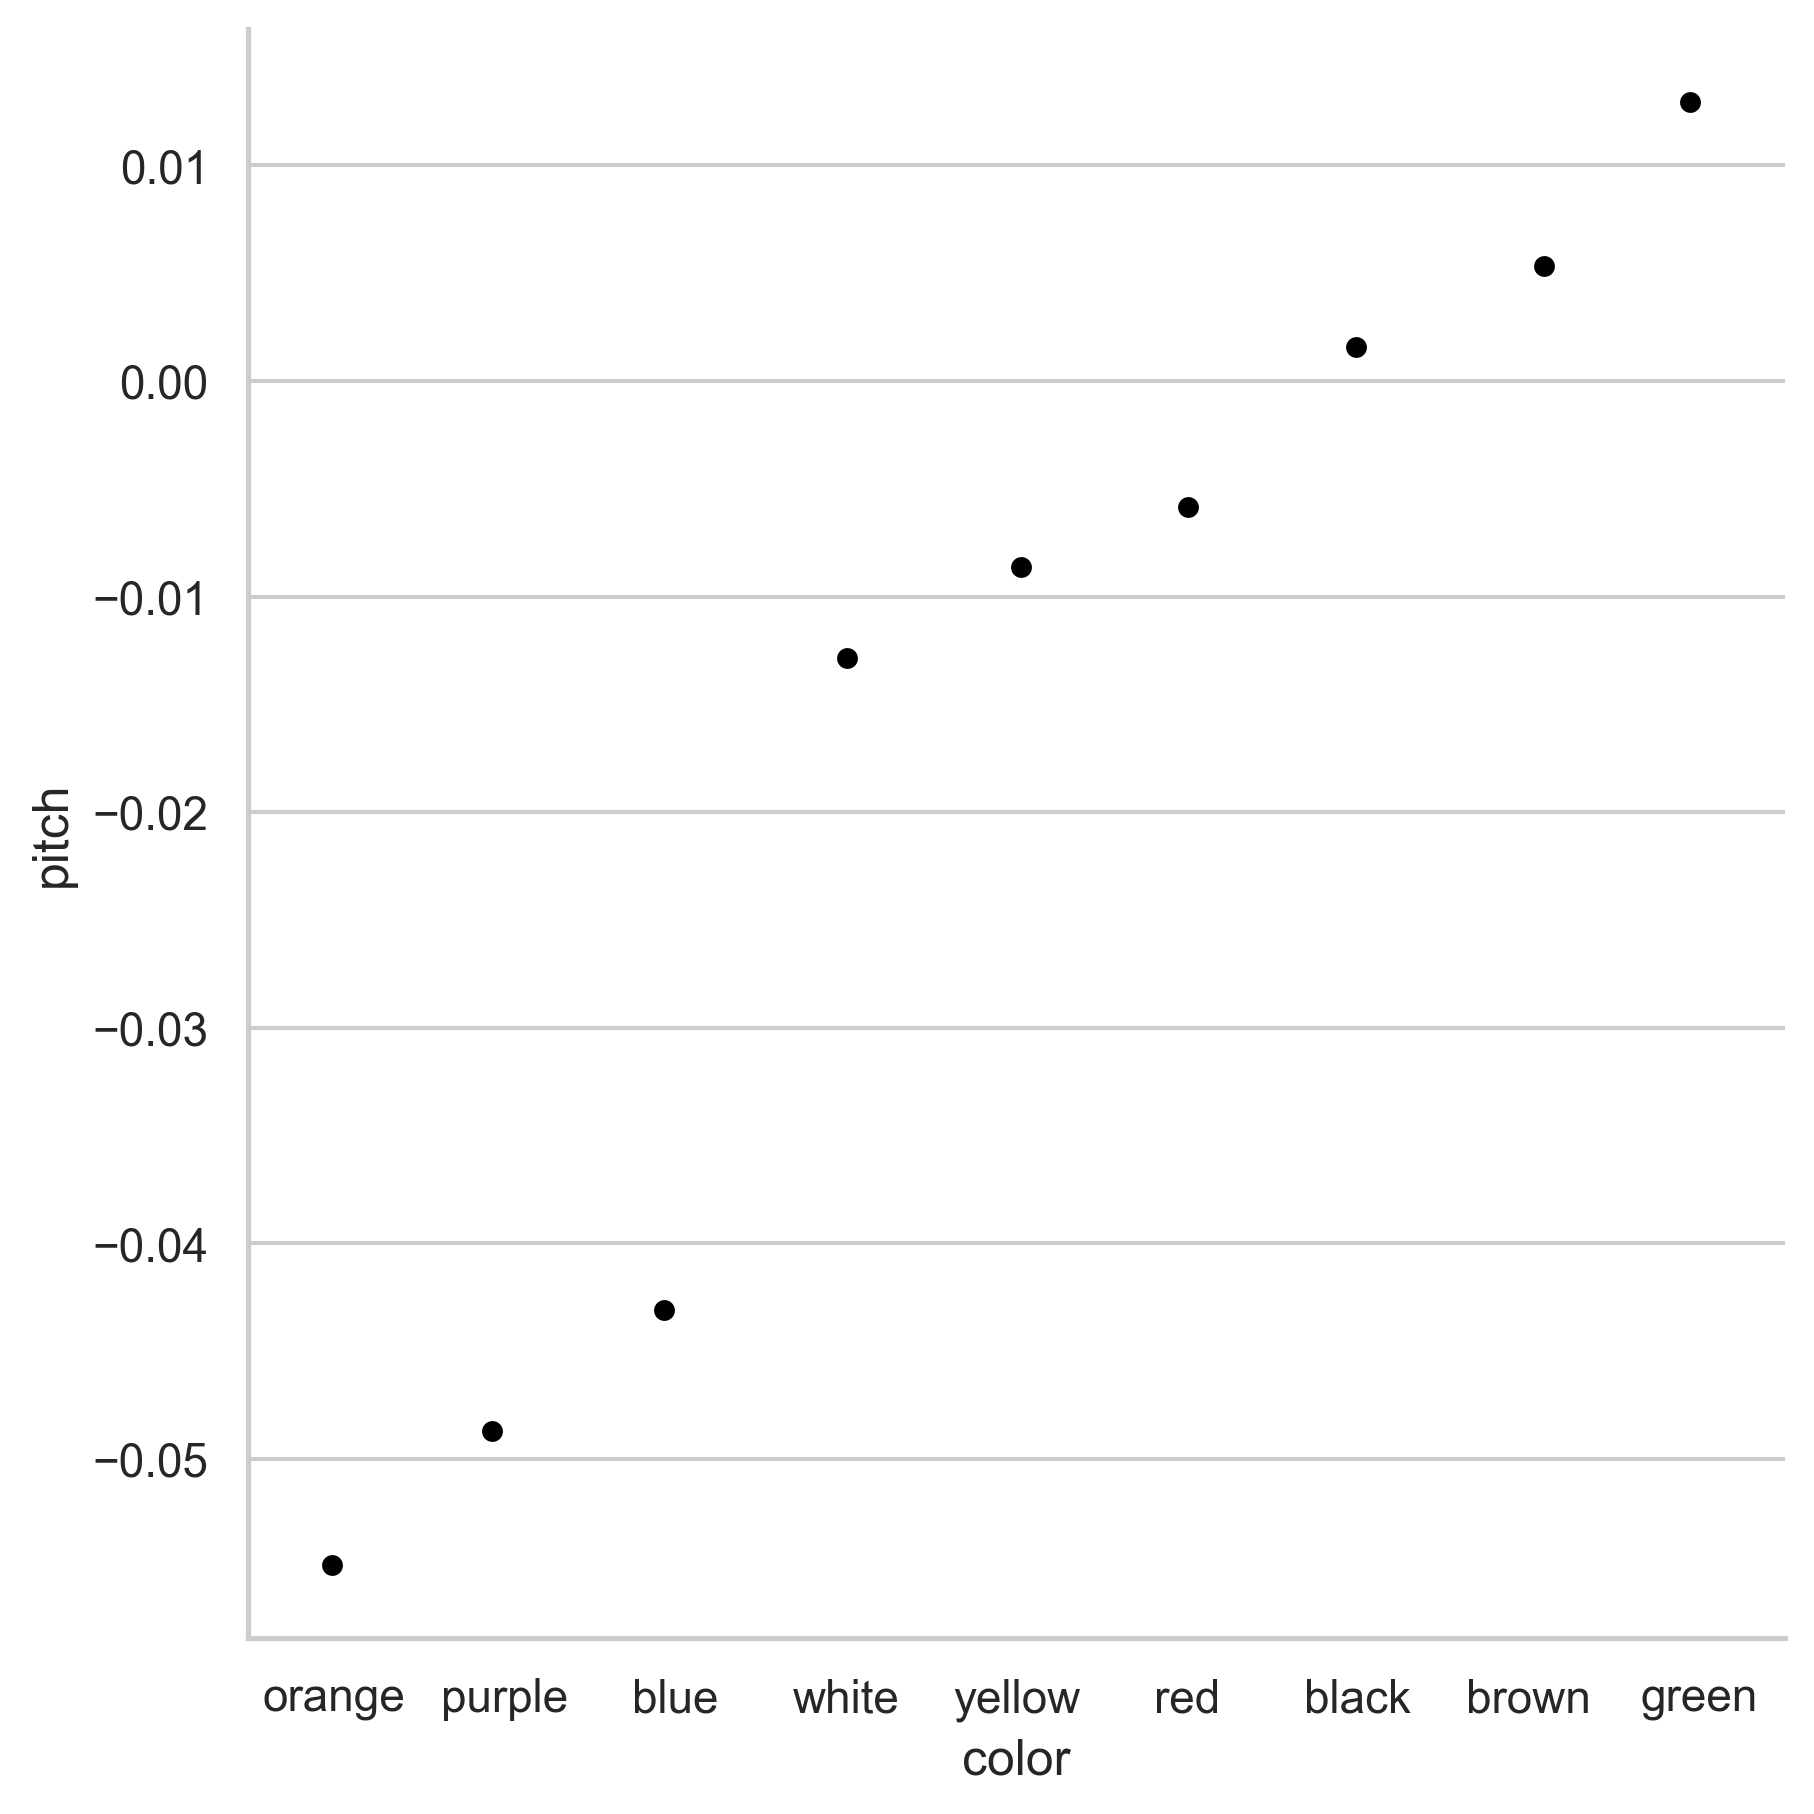

In [4]:
g = sns.catplot(x='color', y='pitch', color='black', data=df_pitch.sort_values('pitch'), height=6)

# Convert notebook to html

In [5]:
convert_notebook('color_pitch')

Jupyter notebook `color_pitch` converted successfully.